<a href="https://colab.research.google.com/github/josephfrancis22/ClimateScope_project-joseph_francis/blob/main/JfClimateScope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MILESTONE 1

# New Section

Data Preparation & Initial Analysis (Weeks 1-2) ● Tasks: ○ Download the Global Weather Repository dataset from Kaggle. ○ Set up project environment. ○ Inspect dataset structure, data types, and key variables. ○ Identify missing values, anomalies, and data coverage. ○ Handle missing or inconsistent entries. ○ Convert units and normalize values. ○ Aggregate or filter data (e.g., daily to monthly averages). ● Evaluation: ○ Deliverable: Cleaned and preprocessed dataset, along with a summary document outlining data schema, key variables, and data quality issues. ○ Success Criteria: Dataset is successfully downloaded, cleaned, and transformed into a usable format, ready for analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("/content/weather_filled.csv")

In [ ]:
data

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.900,11.100,1.0,1.0,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93.0
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.200,29.600,2.0,3.0,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93.0
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.400,7.900,1.0,1.0,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93.0
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.500,0.800,1.0,1.0,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93.0
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.600,203.300,4.0,10.0,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96540,Liberia,Monrovia,6.3106,-10.8047,Africa/Monrovia,1739960100,2025-02-19 10:15,30.2,86.4,Overcast,...,38.110,80.475,2.0,4.0,06:59 AM,06:55 PM,No moonrise,11:29 AM,Waning Gibbous,66.0
96541,Thailand,Nan,18.7833,100.7833,Asia/Bangkok,1739960100,2025-02-19 17:15,29.2,84.6,Partly cloudy,...,43.660,44.955,3.0,5.0,06:42 AM,06:19 PM,11:55 PM,10:30 AM,Waning Gibbous,69.0
96542,Liechtenstein,Vaduz,47.1333,9.5167,Europe/Vaduz,1739960100,2025-02-19 11:15,-0.8,30.6,Overcast,...,8.695,11.100,1.0,1.0,07:20 AM,05:53 PM,12:22 AM,09:38 AM,Waning Gibbous,67.0
96543,Lithuania,Vilnius,54.6833,25.3167,Europe/Vilnius,1739960100,2025-02-19 12:15,-3.0,26.6,Partly cloudy,...,9.065,12.210,1.0,1.0,07:32 AM,05:35 PM,12:46 AM,09:01 AM,Waning Gibbous,67.0


In [ ]:
data.shape

(96545, 41)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96545 entries, 0 to 96544
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       96545 non-null  object 
 1   location_name                 96545 non-null  object 
 2   latitude                      96545 non-null  float64
 3   longitude                     96545 non-null  float64
 4   timezone                      96545 non-null  object 
 5   last_updated_epoch            96545 non-null  int64  
 6   last_updated                  96544 non-null  object 
 7   temperature_celsius           96544 non-null  float64
 8   temperature_fahrenheit        96544 non-null  float64
 9   condition_text                96544 non-null  object 
 10  wind_mph                      96544 non-null  float64
 11  wind_kph                      96544 non-null  float64
 12  wind_degree                   96544 non-null  float64
 13  w

In [ ]:
data.drop_duplicates()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.900,11.100,1.0,1.0,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93.0
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.200,29.600,2.0,3.0,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93.0
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.400,7.900,1.0,1.0,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93.0
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.500,0.800,1.0,1.0,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93.0
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.600,203.300,4.0,10.0,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96540,Liberia,Monrovia,6.3106,-10.8047,Africa/Monrovia,1739960100,2025-02-19 10:15,30.2,86.4,Overcast,...,38.110,80.475,2.0,4.0,06:59 AM,06:55 PM,No moonrise,11:29 AM,Waning Gibbous,66.0
96541,Thailand,Nan,18.7833,100.7833,Asia/Bangkok,1739960100,2025-02-19 17:15,29.2,84.6,Partly cloudy,...,43.660,44.955,3.0,5.0,06:42 AM,06:19 PM,11:55 PM,10:30 AM,Waning Gibbous,69.0
96542,Liechtenstein,Vaduz,47.1333,9.5167,Europe/Vaduz,1739960100,2025-02-19 11:15,-0.8,30.6,Overcast,...,8.695,11.100,1.0,1.0,07:20 AM,05:53 PM,12:22 AM,09:38 AM,Waning Gibbous,67.0
96543,Lithuania,Vilnius,54.6833,25.3167,Europe/Vilnius,1739960100,2025-02-19 12:15,-3.0,26.6,Partly cloudy,...,9.065,12.210,1.0,1.0,07:32 AM,05:35 PM,12:46 AM,09:01 AM,Waning Gibbous,67.0


In [ ]:
data.isnull().sum()

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,1
temperature_celsius,0
temperature_fahrenheit,0
condition_text,1


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


In [ ]:
 data.describe(include="all")

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
count,96544,96544,96544.000000,96544.000000,96544,9.654400e+04,96544,96544.000000,96544.000000,96544,...,96544.000000,96544.000000,96544.000000,96544.000000,96544,96544,96544,96544,96544,96544.000000
unique,210,263,NaN,NaN,194,NaN,15420,NaN,NaN,54,...,NaN,NaN,NaN,NaN,479,537,1441,1441,8,NaN
top,Bulgaria,Beirut,NaN,NaN,Asia/Bangkok,NaN,2023-09-14 16:30,NaN,NaN,Partly cloudy,...,NaN,NaN,NaN,NaN,06:21 AM,06:02 PM,No moonrise,No moonset,Waning Gibbous,NaN
freq,1173,498,NaN,NaN,1712,NaN,47,NaN,NaN,34373,...,NaN,NaN,NaN,NaN,1007,1010,3315,3106,21334,NaN
mean,NaN,NaN,19.210082,21.993284,NaN,1.716928e+09,NaN,21.117035,70.011492,NaN,...,24.776279,47.376148,1.654344,2.540116,NaN,NaN,NaN,NaN,NaN,50.803748
std,NaN,NaN,24.495458,65.744089,NaN,1.395486e+07,NaN,10.164823,18.296772,NaN,...,53.965392,134.053893,1.017055,2.599159,NaN,NaN,NaN,NaN,NaN,35.099200
min,NaN,NaN,-41.300000,-175.200000,NaN,1.693301e+09,NaN,-41.900000,-43.400000,NaN,...,0.185000,0.185000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,3.750000,-6.836100,NaN,1.704392e+09,NaN,15.000000,59.000000,NaN,...,3.600000,6.300000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,16.000000
50%,NaN,NaN,17.250000,23.240000,NaN,1.718287e+09,NaN,24.000000,75.200000,NaN,...,10.545000,16.835000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,51.000000
75%,NaN,NaN,41.316700,49.882200,NaN,1.729244e+09,NaN,28.100000,82.600000,NaN,...,26.200000,42.500000,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,86.000000


In [ ]:
data_clean = data.drop(columns=[
    "temperature_fahrenheit",    #actually represent the same measurement but in different units
    "feels_like_fahrenheit",     #total 7 of them
    "wind_mph",
    "gust_mph",
    "pressure_in",
    "precip_in",
    "visibility_miles"
])
from IPython.display import display
display(data_clean.head())

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,condition_text,wind_kph,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,Sunny,11.5,...,7.9,11.1,1.0,1.0,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93.0
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,Partly cloudy,6.1,...,28.2,29.6,2.0,3.0,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93.0
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,Partly cloudy,13.0,...,6.4,7.9,1.0,1.0,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93.0
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,Sunny,9.7,...,0.5,0.8,1.0,1.0,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93.0
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,Partly cloudy,3.6,...,139.6,203.3,4.0,10.0,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93.0


In [ ]:

data_clean["sunrise"]  = pd.to_datetime(data_clean["sunrise"],  format="%I:%M %p", errors="coerce").dt.time.astype(str).replace("NaT", "None")
data_clean["sunset"]   = pd.to_datetime(data_clean["sunset"],   format="%I:%M %p", errors="coerce").dt.time.astype(str).replace("NaT", "None")
data_clean["moonrise"] = pd.to_datetime(data_clean["moonrise"], format="%I:%M %p", errors="coerce").dt.time.astype(str).replace("NaT", "None")
data_clean["moonset"]  = pd.to_datetime(data_clean["moonset"],  format="%I:%M %p", errors="coerce").dt.time.astype(str).replace("NaT", "None")

In [ ]:
#  Aggregate daily → monthly averages
if "date" in data.columns:
    # 1. Convert to datetime format
    data["date"] = pd.to_datetime(data["date"], errors="coerce")

    # 2. Extract year-month period
    data["year_month"] = data["date"].dt.to_period("M")

    # 3. Group by year-month and calculate averages
    monthly_data = data.groupby("year_month").mean(numeric_only=True).reset_index()
else:
    monthly_data = None

In [ ]:
# filter for extreme weather
if "temperature_celsius" in data.columns:
    hot_days = data[data["temperature_celsius"] > 40]
    print("Countries with temperature higher than 40°C:")
    print(hot_days[['country', 'temperature_celsius']])

if "precip_mm" in data.columns:
    heavy_rain_days = data[data["precip_mm"] > 100]
    print("\nCountries with precipitation greater than 100 mm:")
    print(heavy_rain_days[['country', 'precip_mm']])

Countries with temperature higher than 40°C:
          country  temperature_celsius
8009       Brazil                 40.4
10654     Bolivia                 41.4
10849     Bolivia                 41.2
11044     Bolivia                 40.8
12493      Brazil                 40.5
13581    Paraguay                 42.1
14638      Brazil                 40.5
14833      Brazil                 42.4
15222      Brazil                 40.2
19625    Paraguay                 40.8
21575    Paraguay                 41.5
21965    Paraguay                 41.8
22160    Paraguay                 42.4
22550    Paraguay                 42.3
22745    Paraguay                 43.2
22940    Paraguay                 43.3
24110    Paraguay                 40.9
24500    Paraguay                 42.0
25085    Paraguay                 41.9
25280    Paraguay                 41.7
27035    Paraguay                 41.7
28790    Paraguay                 41.0
29375    Paraguay                 40.2
29570    Paraguay  

In [ ]:
#Standardize (Z-score normalization)

from sklearn.preprocessing import StandardScaler
## Get only numeric columns
numeric_cols = data_clean.select_dtypes(include='number').columns

scaler = StandardScaler()
df_standardized = data_clean.copy()
df_standardized[numeric_cols] = scaler.fit_transform(data_clean[numeric_cols])

display(df_standardized.head())



,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,condition_text,wind_kph,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,0.625014,0.717737,Asia/Kabul,-1.693072,2023-08-29 14:00,0.755842,Sunny,-0.103117,...,-0.312726,-0.270610,-0.643375,-0.592547,None,None,None,None,Waxing Gibbous,1.202206
1,Albania,Tirana,0.903026,-0.033057,Europe/Tirane,-1.693072,2023-08-29 11:30,0.578760,Partly cloudy,-0.525336,...,0.063443,-0.132605,0.339861,0.176936,None,None,None,None,Waxing Gibbous,1.202206
2,Algeria,Algiers,0.716460,-0.288138,Africa/Algiers,-1.693072,2023-08-29 10:30,0.677139,Partly cloudy,0.014166,...,-0.340521,-0.294481,-0.643375,-0.592547,None,None,None,None,Waxing Gibbous,1.202206
3,Andorra,Andorra La Vella,0.950790,-0.311410,Europe/Andorra,-1.693072,2023-08-29 11:30,-1.074007,Sunny,-0.243856,...,-0.449851,-0.347445,-0.643375,-0.592547,None,None,None,None,Waxing Gibbous,1.202206
4,Angola,Luanda,-1.145120,-0.133295,Africa/Luanda,-1.693072,2023-08-29 10:30,0.382002,Partly cloudy,-0.720807,...,2.127740,1.163149,2.306334,2.870129,None,None,None,None,Waxing Gibbous,1.202206


In [ ]:
data_clean.to_csv("weather_cleaned.csv", index=False)

In [ ]:
data=pd.read_csv("weather_cleaned.csv")

In [ ]:
data.isnull().sum()

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
condition_text,0
wind_kph,0


✅ Milestone 1 complete: Cleaned datasets saved.

# MILESTONE 2

Core Analysis & Visualization Design (Weeks 2-4) ● Tasks: ○ Perform statistical analysis to understand distributions, correlations, seasonal patterns, and trends. ○ Identify extreme weather events. ○ Compare weather conditions across regions. ○ Select suitable visualization types (e.g., Choropleth maps, Line charts, Scatterplots, Heatmaps). ○ Design an interactive dashboard layout (wireframes/mockups). ● Evaluation: ○ Deliverable: A report detailing analytical findings (statistical summaries, trends, extreme events, comparative analysis) and a set of wireframes/mockups for the dashboard. ○ Success Criteria: Clear analytical insights are derived and documented. Dashboard design effectively communicates planned insights with appropriate visualization choices.

In [ ]:
# Perform statistical analysis
display(data.describe())

,latitude,longitude,last_updated_epoch,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,...,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_illumination
count,96544.000000,96544.000000,9.654400e+04,96544.000000,96544.000000,96544.000000,96544.000000,96544.000000,96544.000000,96544.000000,...,96544.000000,96544.000000,96544.000000,96544.000000,96544.000000,0.0,0.0,0.0,0.0,96544.000000
mean,19.210082,21.993284,1.716928e+09,21.117035,12.818819,166.951380,1013.937158,0.138278,66.301500,39.078669,...,9.850390,24.776279,47.376148,1.654344,2.540116,NaN,NaN,NaN,NaN,50.803748
std,24.495458,65.744089,1.395486e+07,10.164823,12.789639,104.797879,11.621715,0.612850,23.360177,33.829584,...,40.534866,53.965392,134.053893,1.017055,2.599159,NaN,NaN,NaN,NaN,35.099200
min,-41.300000,-175.200000,1.693301e+09,-41.900000,3.600000,1.000000,947.000000,0.000000,2.000000,0.000000,...,-9999.000000,0.185000,0.185000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,3.750000,-6.836100,1.704392e+09,15.000000,6.100000,78.000000,1010.000000,0.000000,51.000000,0.000000,...,0.600000,3.600000,6.300000,1.000000,1.000000,NaN,NaN,NaN,NaN,16.000000
50%,17.250000,23.240000,1.718287e+09,24.000000,11.200000,159.000000,1013.000000,0.000000,71.000000,25.000000,...,2.035000,10.545000,16.835000,1.000000,1.000000,NaN,NaN,NaN,NaN,51.000000
75%,41.316700,49.882200,1.729244e+09,28.100000,17.600000,254.000000,1018.000000,0.020000,84.000000,75.000000,...,7.300000,26.200000,42.500000,2.000000,3.000000,NaN,NaN,NaN,NaN,86.000000
max,64.150000,179.220000,1.739960e+09,49.200000,2963.200000,360.000000,3006.000000,42.240000,100.000000,100.000000,...,557.000000,1614.100000,6037.290000,6.000000,10.000000,NaN,NaN,NaN,NaN,100.000000


In [ ]:
#Find the top 5 rainiest days per country
rainy_days = (
    data.sort_values("precip_mm", ascending=False)
    .groupby("country")
    .head(5)[["country", "last_updated", "precip_mm"]]

)
display(rainy_days.head(5))


,country,last_updated,precip_mm
75900,Jamaica,2024-11-05 04:00,42.24
39547,Tonga,2024-03-24 05:30,39.64
1631,Haiti,2023-09-05 19:15,31.00
333,Philippines,2023-08-30 11:00,28.70
64559,Vietnam,2024-09-07 19:00,27.82


In [ ]:

# Find the top 5 hottest days per country
top_hot_days = (
     data
    .sort_values(by="temperature_celsius", ascending=False)
    .groupby("country")
    .head(5)[["country","location_name","last_updated", "temperature_celsius"]]
)

display(top_hot_days.head(5))


,country,location_name,last_updated,temperature_celsius
49357,Kuwait,Kuwait City,2024-06-19 16:45,49.2
49921,Iraq,Baghdad,2024-06-22 16:45,49.1
53606,Iraq,Baghdad,2024-07-11 15:45,49.1
50886,Kuwait,Kuwait City,2024-06-27 16:15,48.9
53799,Iraq,Baghdad,2024-07-12 15:45,48.8


In [ ]:
# Find the top 5 high wind days per country
high_wind_days = (
    data[data['wind_kph'] > 50]
    .sort_values("wind_kph", ascending=False)
    .groupby("country")
    .head(5)[["country", "last_updated", "wind_kph"]]
)
print("Top 5 High Wind Events (Wind Speed > 50 kph) per Country:")
display(high_wind_days.head(5))

Top 5 High Wind Events (Wind Speed > 50 kph) per Country:


,country,last_updated,wind_kph
50062,Burundi,2024-06-23 15:45,2963.2
49709,Ethiopia,2024-06-21 16:30,272.2
43654,Burundi,2024-05-21 16:45,258.8
51136,Saint Kitts and Nevis,2024-06-28 09:15,205.9
43295,Fiji Islands,2024-05-20 02:00,172.1


In [ ]:
# Compare weather conditions across regions (example: average temperature per country)
average_temp_per_country = data.groupby('country')['temperature_celsius'].mean().reset_index()
display(average_temp_per_country)

,country,temperature_celsius
0,Afghanistan,13.405242
1,Albania,18.842944
2,Algeria,21.129697
3,Andorra,8.302218
4,Angola,26.845363
...,...,...
205,Гватемала,15.900000
206,Польша,24.200000
207,Турция,34.000000
208,كولومبيا,23.100000


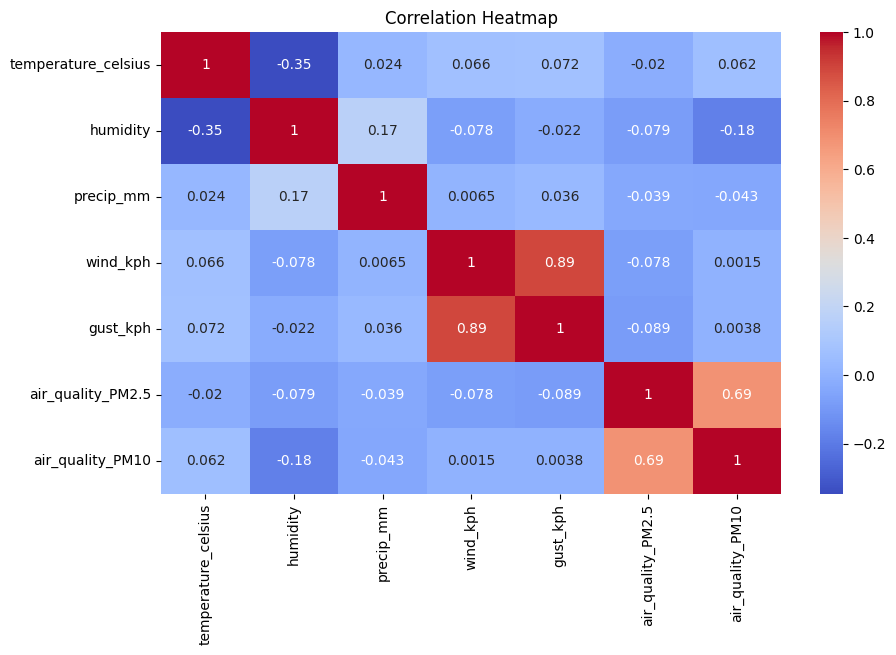

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(data[['temperature_celsius', 'humidity', 'precip_mm', 'wind_kph',
                  'gust_kph', 'air_quality_PM2.5', 'air_quality_PM10']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

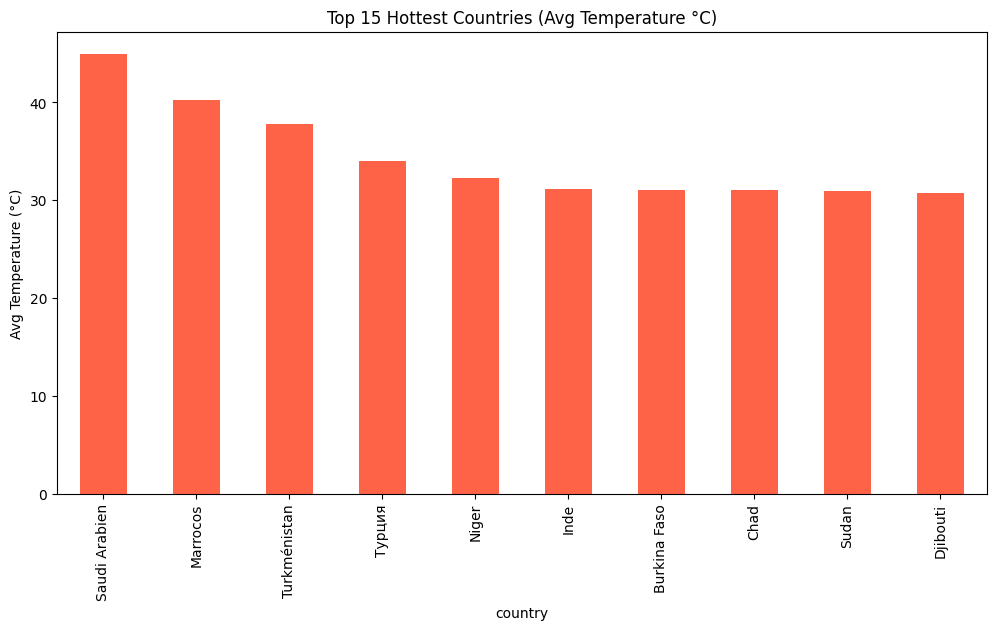

In [ ]:
# 10 Top most hottest  countries
region_avg = data.groupby('country')[['temperature_celsius', 'precip_mm', 'humidity']].mean().sort_values(by='temperature_celsius', ascending=False)

plt.figure(figsize=(12,6))
region_avg['temperature_celsius'].head(10).plot(kind='bar', color='tomato')
plt.title("Top 15 Hottest Countries (Avg Temperature °C)")
plt.ylabel("Avg Temperature (°C)")
plt.show()

In [ ]:
import plotly.express as px

# Ensure you have the average_temp_per_country DataFrame from previous steps
if 'average_temp_per_country' in locals() and average_temp_per_country is not None:
    fig = px.choropleth(average_temp_per_country,
                        locations="country",
                        locationmode='country names',
                        color="temperature_celsius",
                        hover_name="country",
                        color_continuous_scale="Plasma",
                        title="Average Temperature per Country")
    fig.show()
else:
    print("Please run the cell to calculate average_temp_per_country first.")

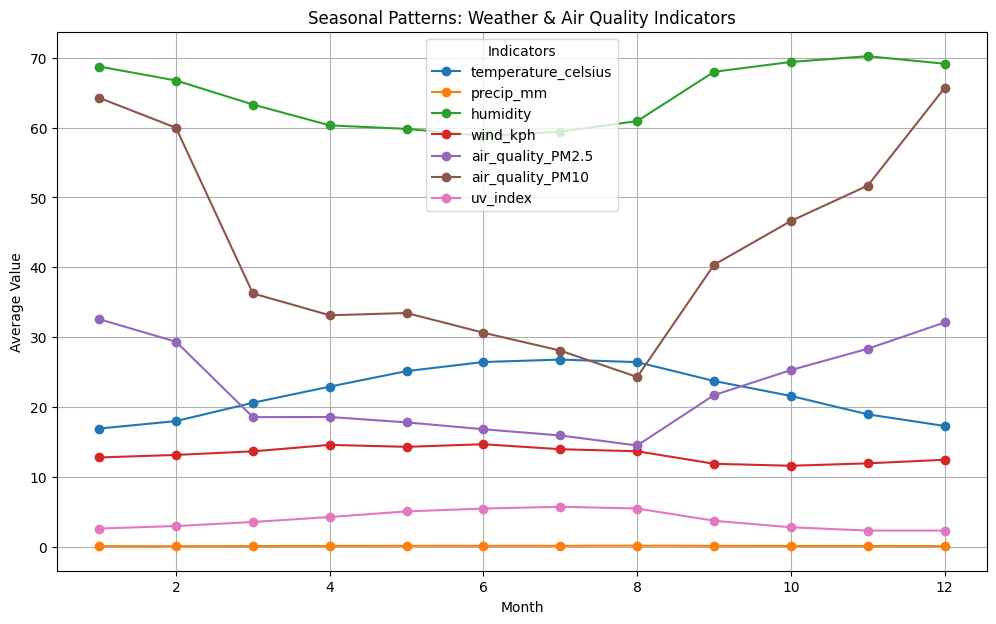

In [ ]:
# Convert 'last_updated' to datetime objects
data["last_updated"] = pd.to_datetime(data["last_updated"])

# Extract month from datetime
data["month"] = data["last_updated"].dt.month

# Add more important seasonal columns
cols_to_analyze = [
    "temperature_celsius",
    "precip_mm",
    "humidity",
    "wind_kph",
    "air_quality_PM2.5",
    "air_quality_PM10",
    "uv_index"
]

# Compute monthly averages
monthly_avg = data.groupby("month")[cols_to_analyze].mean()

# Plot
monthly_avg.plot(kind="line", marker="o", figsize=(12, 7))
plt.title("Seasonal Patterns: Weather & Air Quality Indicators")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.legend(title="Indicators")
plt.grid(True)
plt.show()

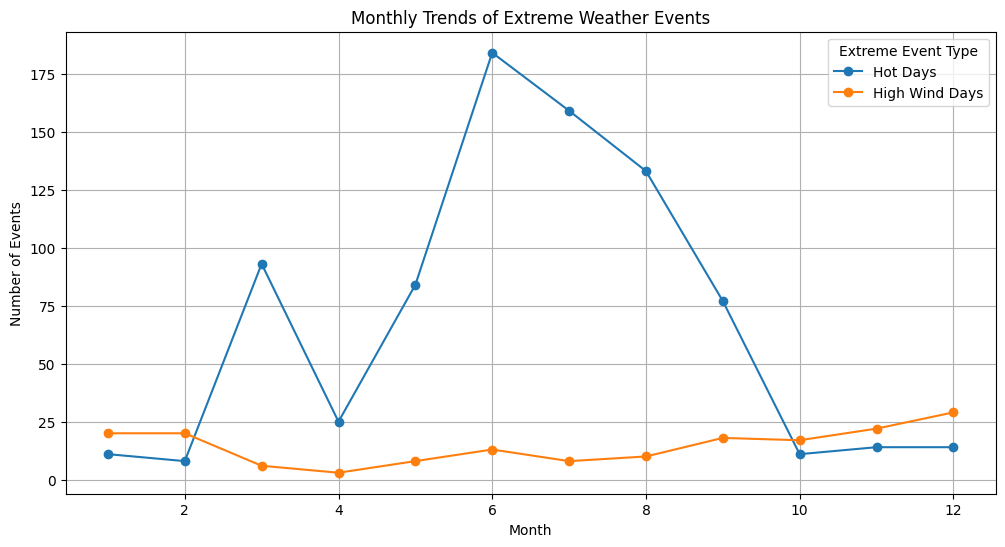

In [ ]:
# Define extreme events based on previous filtering
extreme_events = {
    "Hot Days": data[data["temperature_celsius"] > 40],
    "Heavy Rain Days": data[data["precip_mm"] > 100],
    "High Wind Days": data[data["wind_kph"] > 50]
}

# Count number of extreme events per month (example: heatwave, storm, heavy rain etc.)
extreme_counts = {}
for event, df_event in extreme_events.items():
    if not df_event.empty:
        df_event = df_event.copy()
        df_event["month"] = df_event["last_updated"].dt.month
        extreme_counts[event] = df_event.groupby("month").size()

# Plot each extreme event trend
plt.figure(figsize=(12, 6))
for event, counts in extreme_counts.items():
    plt.plot(counts.index, counts.values, marker="o", label=event)

plt.legend(title="Extreme Event Type")
plt.title("Monthly Trends of Extreme Weather Events")
plt.xlabel("Month")
plt.ylabel("Number of Events")
plt.grid(True)
plt.show()